In [1]:
%matplotlib inline
import random
import torch 
import matplotlib.pyplot as plt
torch.__version__

'1.10.0+cpu'

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy
numpy.__version__

'1.21.3'

In [3]:
def synthetic_data(w, b, num_samples):
    x = torch.normal(0,1,(num_samples, len(w)))
    y = torch.matmul(x,w) + b
    y_noise = torch.normal(0,0.01, y.shape)
    y += y_noise
    return x, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
features.shape, labels.shape, features[0], labels[0]

(torch.Size([1000, 2]),
 torch.Size([1000, 1]),
 tensor([-0.3521,  0.9797]),
 tensor([0.1439]))

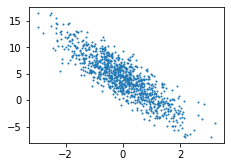

In [5]:
plt.figure(figsize=(3.5,2.5))
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)
plt.show()

In [6]:
def data_iter(batch_size, features, labels):
    num_samples = len(features)
    indices = list(range(num_samples))
    random.shuffle(indices)

    for i in range(0,num_samples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_samples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n', y)
    break

tensor([[ 0.2211, -0.5452],
        [ 2.0720,  0.2140],
        [-0.6075, -0.9688],
        [ 0.9149,  0.2326],
        [-1.3253,  0.4224],
        [ 1.0592, -0.7761],
        [-0.1127,  0.7857],
        [-0.4938,  1.1387],
        [-1.1566, -0.1983],
        [-0.8597, -0.7508]]) 
 tensor([[ 6.4911],
        [ 7.6255],
        [ 6.2852],
        [ 5.2561],
        [ 0.1041],
        [ 8.9574],
        [ 1.3164],
        [-0.6679],
        [ 2.5575],
        [ 5.0334]])


In [7]:
true_w.shape

torch.Size([2])

In [8]:
w = torch.normal(0,0.01,(2,1))
w.requires_grad_(True)
b = torch.zeros(1)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [9]:
def linearregression(X,w,b):
    return torch.matmul(X,w) +b

In [10]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [13]:
def sgd(pramas, lr, batch_size):
    with torch.no_grad():
        for param in pramas:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [15]:
lr = 0.03
num_epochs = 10
net = linearregression
loss = squared_loss

for i in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    train_loss = loss(net(features,w,b), labels)
    print(f'epoch: {i+1} , loss {float(train_loss.mean()):f}')

epoch: 1 , loss 0.000048
epoch: 2 , loss 0.000049
epoch: 3 , loss 0.000048
epoch: 4 , loss 0.000048
epoch: 5 , loss 0.000048
epoch: 6 , loss 0.000048
epoch: 7 , loss 0.000048
epoch: 8 , loss 0.000048
epoch: 9 , loss 0.000048
epoch: 10 , loss 0.000048


In [16]:
print(f'w\'s prediction error {true_w - w.reshape(true_w.shape)}')
print(f'b\'s prediction error {true_b - b}')

w's prediction error tensor([0.0002, 0.0005], grad_fn=<SubBackward0>)
b's prediction error tensor([0.0003], grad_fn=<RsubBackward1>)


In [18]:
from torch.utils import data

In [19]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels), batch_size)

next(iter(data_iter))

[tensor([[ 0.2805, -0.9471],
         [ 0.0268,  0.1752],
         [-0.3353,  0.7053],
         [ 0.1637, -0.6696],
         [-0.7478, -0.4215],
         [-0.4160,  0.3069],
         [-1.9674,  0.9445],
         [-1.6611,  1.2633],
         [ 0.0921,  0.3659],
         [-0.7217, -1.3699]]),
 tensor([[ 7.9818],
         [ 3.6450],
         [ 1.1262],
         [ 6.8039],
         [ 4.1400],
         [ 2.3228],
         [-2.9402],
         [-3.4093],
         [ 3.1238],
         [ 7.4008]])]

In [20]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))

In [22]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [28]:
loss = nn.MSELoss()

In [32]:
trainer = torch.optim.SGD(net.parameters(), lr=0.003)

In [33]:
num_epochs = 10
for e in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {e+1}, loss {l:f}')

epoch 1, loss 0.000097
epoch 2, loss 0.000097
epoch 3, loss 0.000097
epoch 4, loss 0.000097
epoch 5, loss 0.000097
epoch 6, loss 0.000097
epoch 7, loss 0.000097
epoch 8, loss 0.000097
epoch 9, loss 0.000097
epoch 10, loss 0.000097
